In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import hexprop as hp

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
# Define parameters
wl = 520e-9 # Wavelength
n = 200 # Sampling resolution (2, n, m)
m = int(n * 1.5)
s_h = 10e-6 # Sample spacing
z = 0.2 # Propagation distance

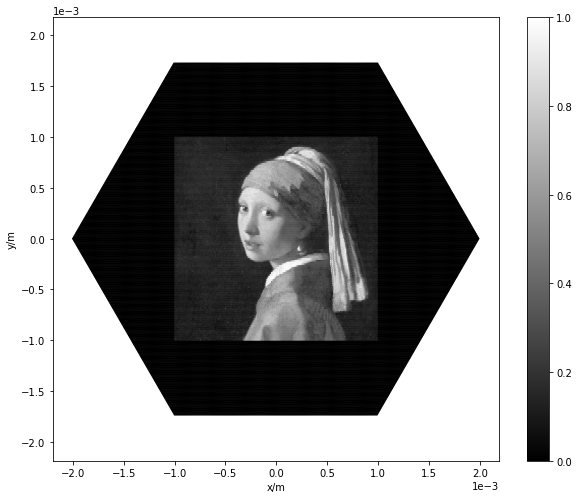

In [3]:
# Two ways to create the ASA-represented field: 1. From an image
u_0 = hp.img2hex(n, m, s_h, 2e-3, 'data/target_06.png')
hp.Hex(u_0).set_side(s_h).plot(datatype='intensity', figsize=(10, 8), cmap='gray')

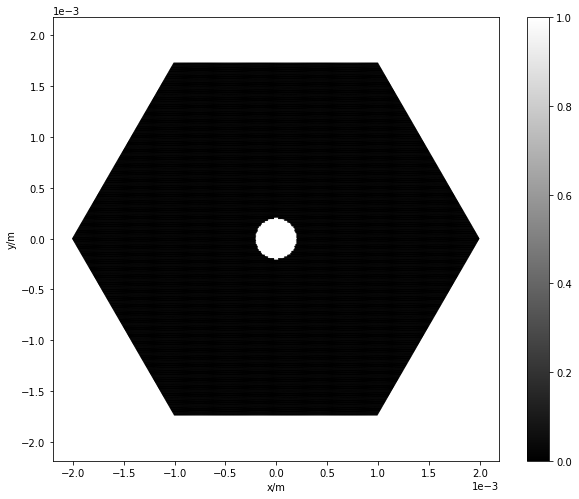

In [3]:
# 2. Create a circular source with a radius of 0.2 mm by the Cartesian coordinates
x, y = hp.hex_xy_grid(n, m, s_h) # Calculate the shifted xy coordinates
r = 0.2e-3
u_0 = ((x ** 2 + y ** 2) <= r ** 2).float()
hp.Hex(u_0).set_side(s_h).plot(datatype='intensity', figsize=(10, 8), cmap='gray')

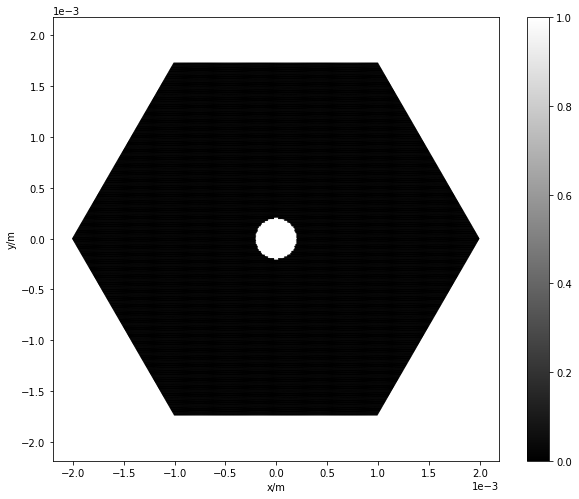

In [5]:
# Or, use the implemented functions in the module directly (Gaussian, rectangular, circular, and spiral)
u_0 = hp.circular(n, m, s_h, r)
hp.Hex(u_0).set_side(s_h).plot(datatype='intensity', figsize=(10, 8), cmap='gray')

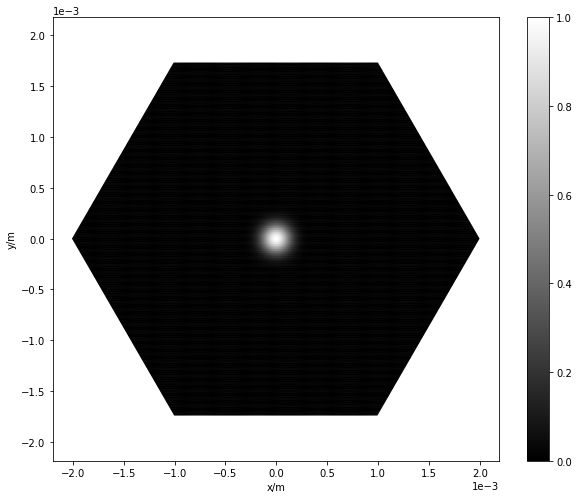

In [6]:
u_0 = hp.gaussian(n, m, s_h, r)
hp.Hex(u_0).set_side(s_h).plot(datatype='intensity', figsize=(10, 8), cmap='gray')

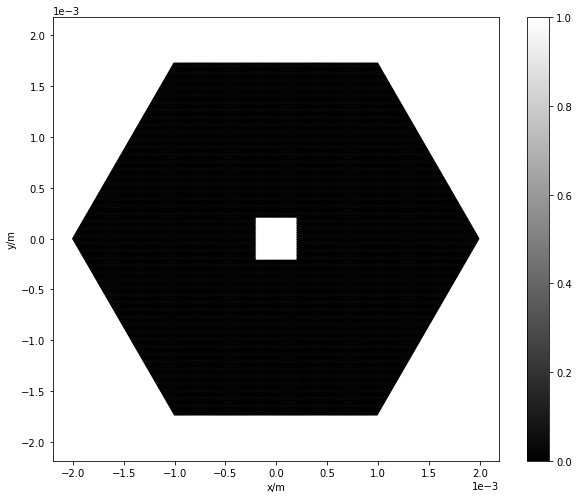

In [4]:
u_0 = hp.rectangular(n, m, s_h, r)
hp.Hex(u_0).set_side(s_h).plot(datatype='intensity', figsize=(10, 8), cmap='gray')

In [6]:
# Choose approptiate diffraction solution via the Fresnel number and 
print(f"Nf = {r ** 2 / wl / z}\nz_critical: {1.5 * s_h ** 2 * n / wl} m")

Nf = 0.38461538461538464
z_critical: 0.0576923076923077 m


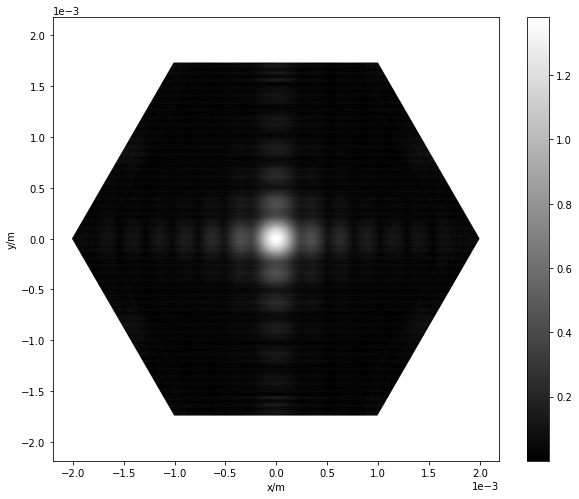

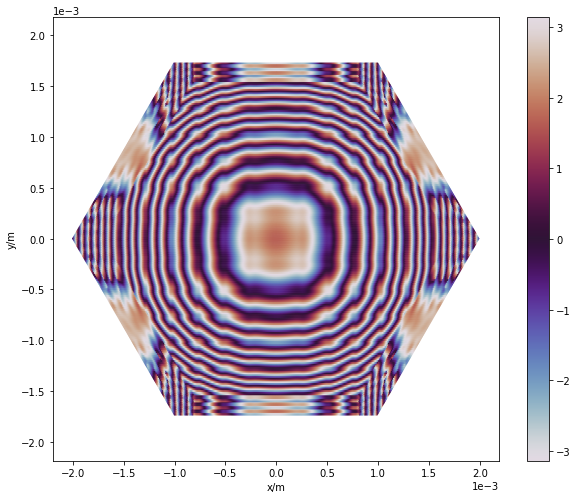

In [5]:
# Do the propagation
prop = hp.Prop(n, m, s_h, wl, z, method='FresnelIR') # Propagation kernel for Fresnel impulse response slution
u_1 = prop(u_0)
hp.Hex(u_1).set_side(s_h).plot(datatype='amplitude', figsize=(10, 8), cmap='gray')
hp.Hex(u_1).set_side(s_h).plot(datatype='phase', figsize=(10, 8), cmap='twilight')

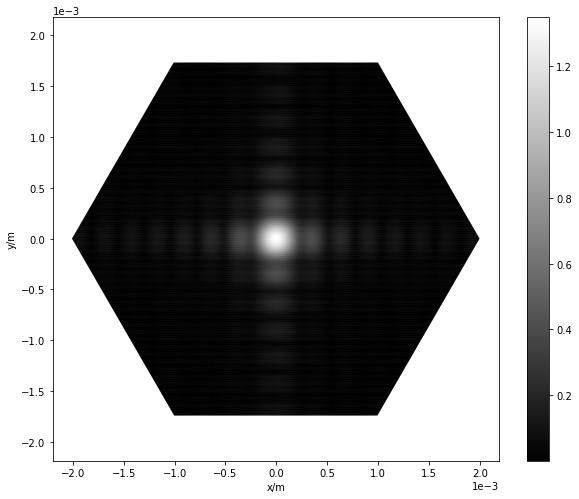

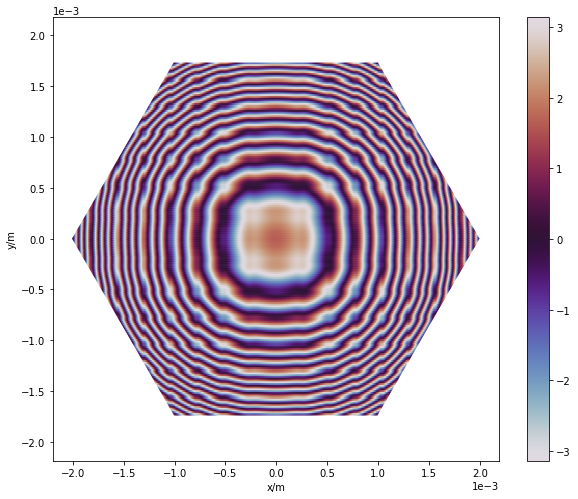

In [6]:
# Use the analytical solution
u_1_gt = hp.rect_result_fn(n, m, s_h, r, wl, z)
hp.Hex(u_1_gt).set_side(s_h).plot(datatype='amplitude', figsize=(10, 8), cmap='gray')
hp.Hex(u_1_gt).set_side(s_h).plot(datatype='phase', figsize=(10, 8), cmap='twilight')

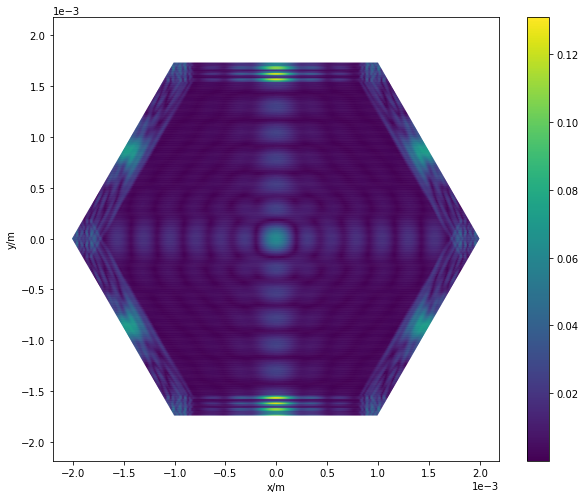

In [8]:
# Calculate the error
error = u_1 - u_1_gt
hp.Hex(error).set_side(s_h).plot(datatype='amplitude', figsize=(10, 8), cmap='viridis')